In [23]:
import os
import cv2
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import keras 
from keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [25]:
path='/Users/sunny/Desktop/Proj/Dataset/chest_xray'
pd.DataFrame(os.listdir(path),columns=['Files'])


,Files
0,.DS_Store
1,test
2,chest_xray
3,train
4,val


In [26]:
dict_ = {'train': [], 'test': [], 'val': []}

# Populate the dictionary with image counts
for i in tqdm(['train', 'test', 'val']):
    path_ = os.path.join(path, i)
    for j in os.listdir(path_):
        subpath = os.path.join(path_, j)
        # Check if the current item is a directory
        if os.path.isdir(subpath):
            # Count the number of images within the subdirectory
            dict_[i].append(len(os.listdir(subpath)))

# Create a DataFrame from the dictionary
df = pd.concat({k: pd.Series(v) for k, v in dict_.items()}, axis=1)

# Display the DataFrame
print(df)


100%|██████████| 3/3 [00:00<00:00, 81.20it/s]

   train  test  val
0   3875   390    8
1   1341   234    8


  0%|          | 0/3 [00:00<?, ?it/s]


NotADirectoryError: [Errno 20] Not a directory: '/Users/sunny/Desktop/Proj/Dataset/chest_xray/train/.DS_Store'

In [27]:
#Size
def Size(folder):
    size=[]
    path_=os.path.join(path,folder)
    for i in tqdm(os.listdir(path_)):
        path2=os.path.join(path_,i)
        for j in os.listdir(path2):
            img=cv2.imread(os.path.join(path2,j))
            size.append(img.shape)
    return pd.Series(size)

In [28]:
def Size(folder):
    size = []
    path_ = os.path.join(path, folder)
    for i in tqdm(os.listdir(path_)):
        path2 = os.path.join(path_, i)
        # Check if the current item is a directory
        if os.path.isdir(path2):
            for j in os.listdir(path2):
                img = cv2.imread(os.path.join(path2, j))
                size.append(img.shape)
    return pd.Series(size)


In [29]:
# calculating the size of train
Size('train')

100%|██████████| 3/3 [00:24<00:00,  8.06s/it]


0        (736, 1048, 3)
1         (672, 984, 3)
2         (712, 992, 3)
3        (888, 1224, 3)
4         (480, 864, 3)
             ...       
5211    (2025, 2338, 3)
5212    (1259, 1654, 3)
5213    (1391, 1762, 3)
5214    (1020, 1450, 3)
5215    (1429, 1862, 3)
Length: 5216, dtype: object

In [30]:
Size('test')

100%|██████████| 3/3 [00:02<00:00,  1.17it/s]


0       (808, 1120, 3)
1       (696, 1040, 3)
2       (544, 1016, 3)
3        (608, 976, 3)
4       (768, 1168, 3)
            ...       
619    (1442, 1724, 3)
620     (824, 1168, 3)
621    (2074, 2380, 3)
622     (936, 1336, 3)
623    (1688, 1960, 3)
Length: 624, dtype: object

In [31]:
Size('val')

100%|██████████| 3/3 [00:00<00:00, 34.73it/s]


0      (864, 1256, 3)
1      (656, 1016, 3)
2      (952, 1192, 3)
3       (592, 968, 3)
4      (664, 1152, 3)
5      (712, 1072, 3)
6      (944, 1416, 3)
7     (1128, 1664, 3)
8     (1225, 1632, 3)
9     (1104, 1240, 3)
10    (1416, 1736, 3)
11     (928, 1288, 3)
12    (1040, 1272, 3)
13    (1104, 1328, 3)
14    (1302, 1564, 3)
15    (1416, 1776, 3)
dtype: object

In [33]:
Size = 80
images = []
labels = []
label_dict = {'NORMAL': 0, 'PNEUMONIA': 1}  # Adjust labels as needed

def load():
    global images
    global labels
    for folder in tqdm(['train', 'test', 'val']):
        path_ = os.path.join(path, folder)
        for label in os.listdir(path_):
            label_path = os.path.join(path_, label)
            # Check if the current item is a directory
            if os.path.isdir(label_path):
                for img in os.listdir(label_path):
                    image = cv2.imread(os.path.join(label_path, img))
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    image = cv2.resize(image, (Size, Size))
                    image = image / 255.0
                    images.append(image)
                    labels.append(label_dict[label])

load()

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Shuffle the data
indices = np.arange(images.shape[0])
np.random.shuffle(indices)

images = images[indices]
labels = labels[indices]


100%|██████████| 3/3 [00:27<00:00,  9.06s/it]


In [34]:
print('Images Shape :',images.shape)
print('Labels Shape :',labels.shape)

Images Shape : (5856, 80, 80, 3)
Labels Shape : (5856,)


In [35]:
labels[0]

1

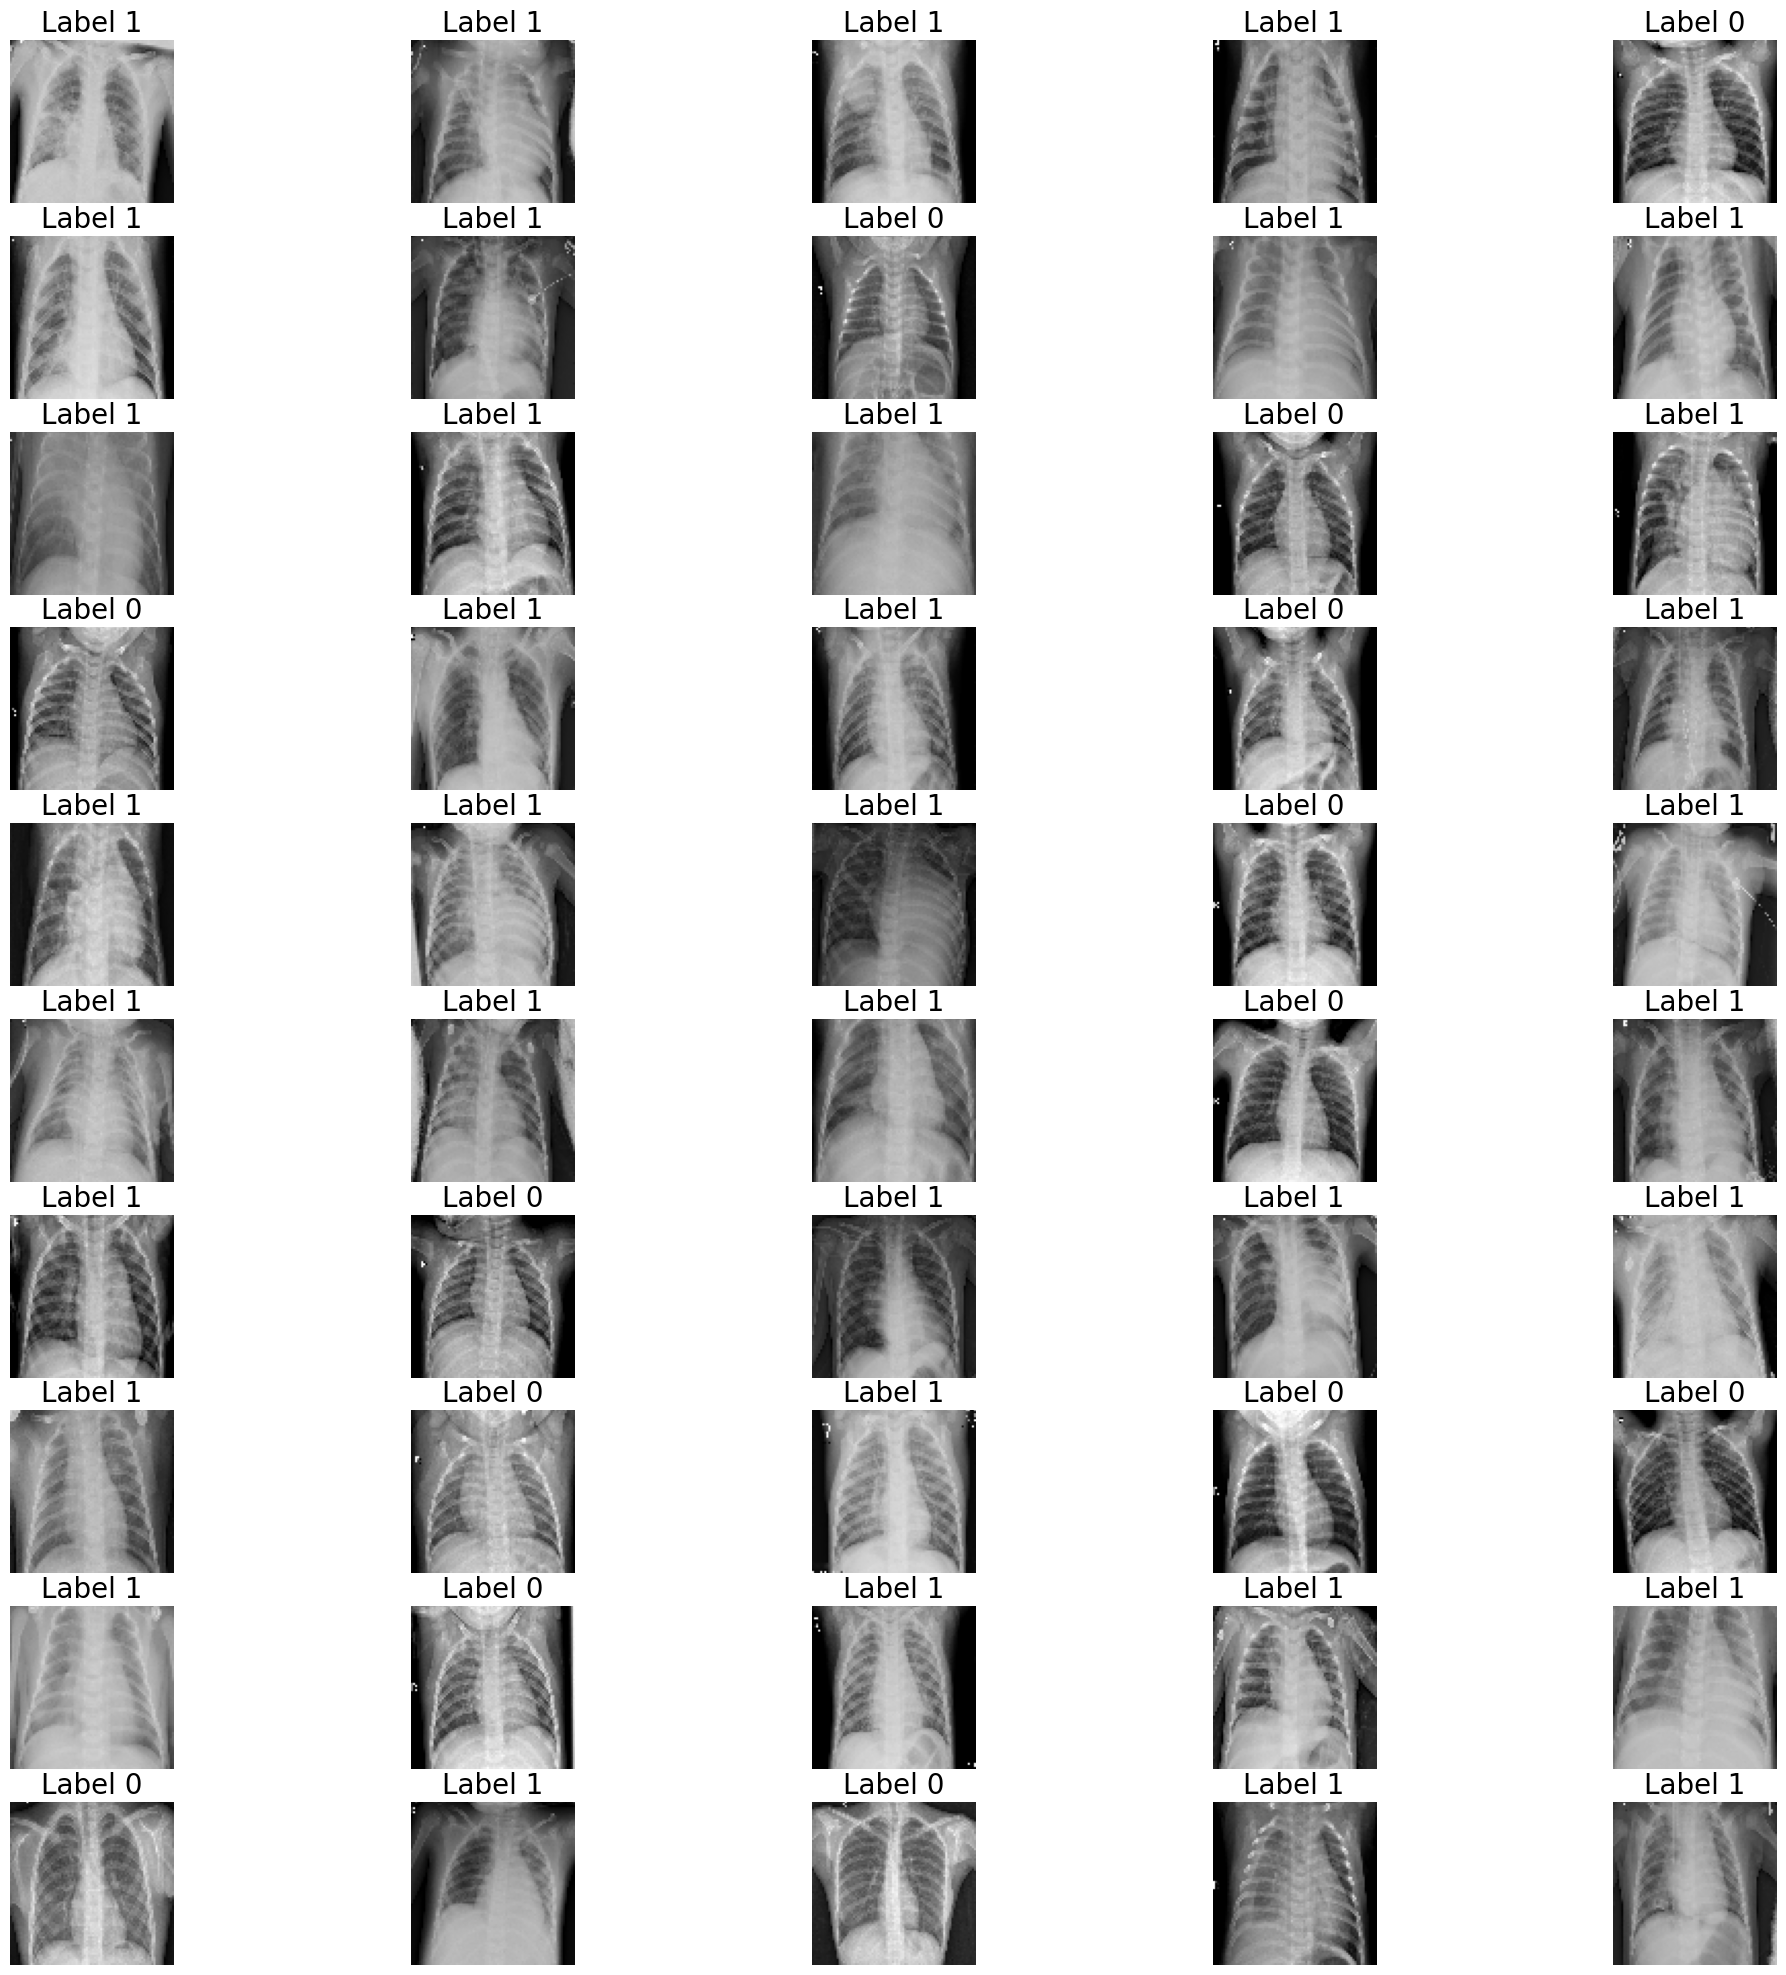

In [36]:

plt.figure(figsize=(25,25))
x = 1
for i in np.random.randint(0,len(images),50):
    plt.subplot(10, 5, x)
    plt.imshow(images[i])
    plt.title(f'Label {labels[i]}', fontsize=20)
    plt.axis('off')    
    x += 1

In [37]:
label=LabelEncoder()
labels=label.fit_transform(labels)
labels

array([1, 1, 0, ..., 1, 0, 0])

In [38]:
X_train, X_test2, y_train, y_test2 = train_test_split(images, labels, test_size=0.30, random_state=44, shuffle =True)
X_val, X_test, y_val, y_test = train_test_split(X_test2, y_test2, test_size=0.50, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_val shape is ' , X_val.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_val shape is ' , y_val.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (4099, 80, 80, 3)
X_val shape is  (878, 80, 80, 3)
X_test shape is  (879, 80, 80, 3)
y_train shape is  (4099,)
y_val shape is  (878,)
y_test shape is  (879,)


# CNN MODEL

In [39]:
class_num=1
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3),activation=tf.nn.relu,input_shape=(Size,Size,3)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D((3,3)))  
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3),activation=tf.nn.relu)) 
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D((2,2))) 
model.add(keras.layers.Dropout(.3)) 
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3,3),activation=tf.nn.relu))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D((2,2))) 
model.add(keras.layers.Dropout(.3)) 
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256,activation=tf.nn.relu))
model.add(keras.layers.Dropout(.3)) 
model.add(keras.layers.Dense(128,activation=tf.nn.relu)) 
model.add(keras.layers.Dropout(.3)) 
model.add(keras.layers.Dense(class_num,activation=tf.nn.sigmoid))

In [40]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 78, 78, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 26, 26, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        256       
 chNormalization)                                                
                                                        

In [42]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=120)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [43]:
checkpoint_cb =ModelCheckpoint("cnn_model.h5", save_best_only=True)
early_stopping_cb =EarlyStopping(patience=5, restore_best_weights=True)
model.compile(optimizer ='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist=model.fit(X_train,y_train,epochs=10,validation_data=(X_val,y_val),callbacks=[checkpoint_cb,early_stopping_cb])


Epoch 1/10
129/129 [==============================] - 7s 51ms/step - loss: 0.3679 - accuracy: 0.8709 - val_loss: 4.2059 - val_accuracy: 0.7483
Epoch 2/10
129/129 [==============================] - 6s 48ms/step - loss: 0.2138 - accuracy: 0.9188 - val_loss: 3.7589 - val_accuracy: 0.7483
Epoch 3/10
129/129 [==============================] - 6s 46ms/step - loss: 0.1756 - accuracy: 0.9358 - val_loss: 1.6287 - val_accuracy: 0.7494
Epoch 4/10
129/129 [==============================] - 6s 45ms/step - loss: 0.1530 - accuracy: 0.9427 - val_loss: 0.2837 - val_accuracy: 0.9146
Epoch 5/10
129/129 [==============================] - 6s 46ms/step - loss: 0.1445 - accuracy: 0.9507 - val_loss: 0.4745 - val_accuracy: 0.7380
Epoch 6/10
129/129 [==============================] - 6s 45ms/step - loss: 0.1309 - accuracy: 0.9541 - val_loss: 0.3664 - val_accuracy: 0.8554
Epoch 7/10
129/129 [==============================] - 6s 46ms/step - loss: 0.1212 - accuracy: 0.9578 - val_loss: 0.5077 - val_accuracy: 0.8656

In [44]:
score, acc = model.evaluate(X_test,y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

28/28 [==============================] - 0s 12ms/step - loss: 0.2140 - accuracy: 0.9067
Test Loss = 0.214036226272583
Test Accuracy = 0.9067121744155884


In [45]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,0.367883,0.870944,4.205915,0.748292
1,0.213832,0.918761,3.758895,0.748292
2,0.175647,0.935838,1.628658,0.749431
3,0.152984,0.942669,0.283700,0.914579
4,0.144498,0.950720,0.474510,0.738041
5,0.130902,0.954135,0.366384,0.855353
6,0.121193,0.957795,0.507720,0.865604
7,0.117954,0.959746,0.115489,0.961276
8,0.104532,0.962186,0.936742,0.768793
9,0.096163,0.966089,0.188057,0.941913


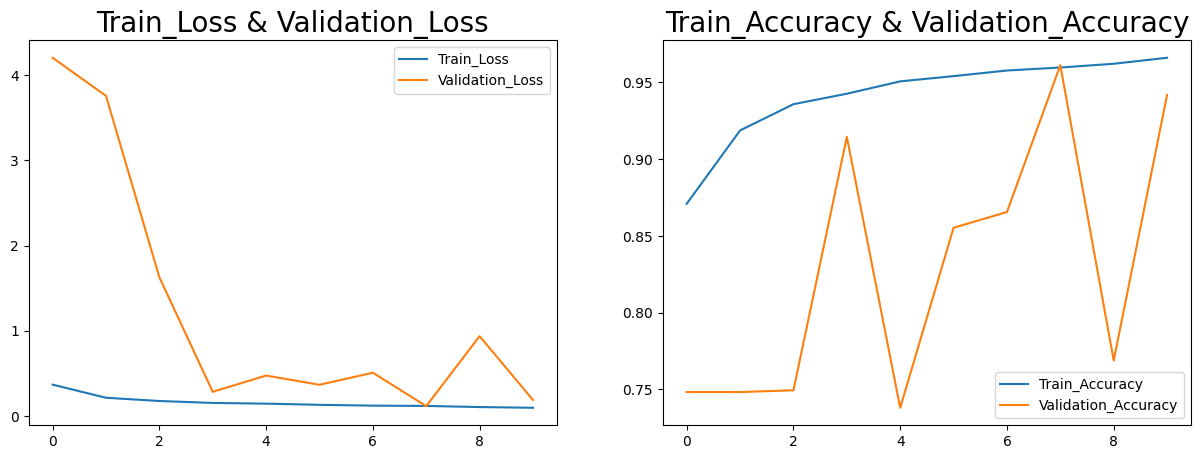

In [46]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()

In [47]:
prediction = model.predict(X_test)
prediction[0]

28/28 [==============================] - 0s 12ms/step


array([0.98373234], dtype=float32)

In [48]:
y_pred=np.where(prediction>=.5,1,0)
df=pd.DataFrame()
df['Actual'],df['Prediction']=label.inverse_transform(y_test),label.inverse_transform(y_pred)
df

,Actual,Prediction
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
874,1,1
875,1,1
876,1,0
877,0,0


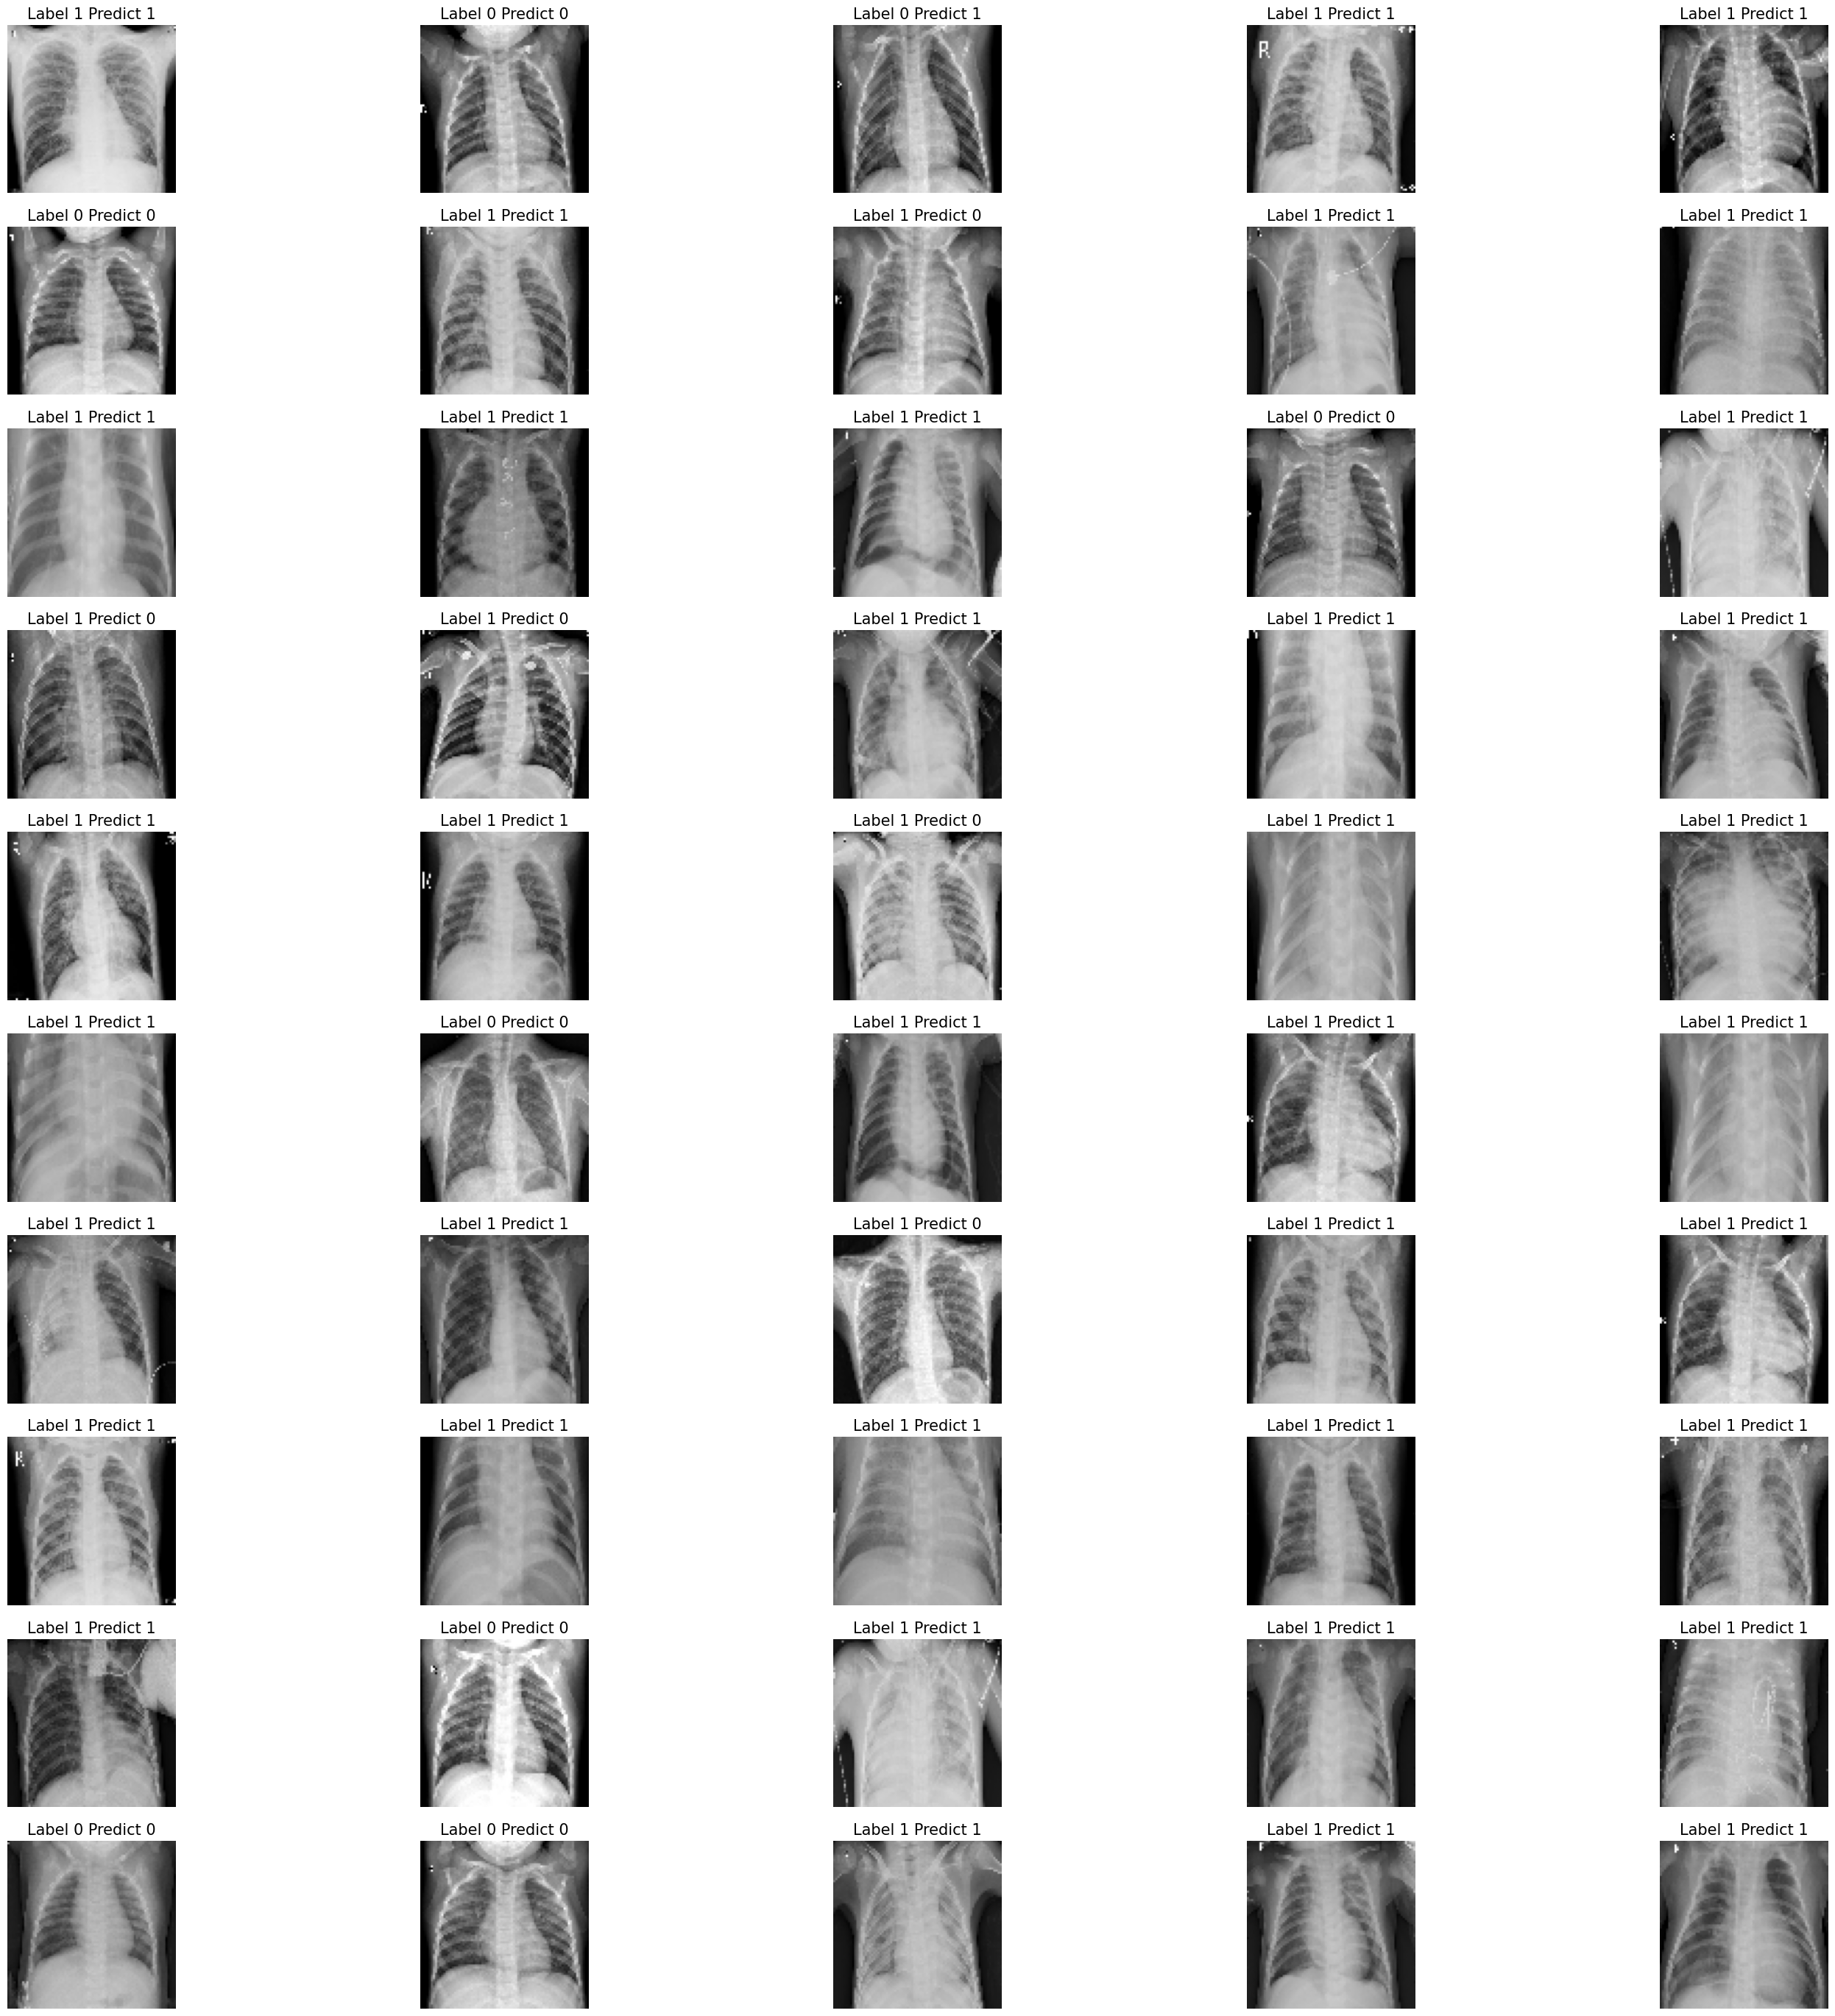

In [49]:
#ploting the images visually
y_test2=label.inverse_transform(y_test)
y_pred2=label.inverse_transform(y_pred)
plt.figure(figsize=(35,35))
x = 1
for i in np.random.randint(0,len(X_test),50):
    plt.subplot(10, 5, x)
    plt.imshow(X_test[i])
    plt.title(f'Label {y_test2[i]} Predict {y_pred2[i]}', fontsize=15)
    plt.axis('off')    
    x += 1